In [1]:
#트리 모형의 max_leaf_nodes
import pandas as pd
df = pd.read_csv('/Users/soojungchoi/pythonProject/pythonBasic/data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
train_cols = df.columns[:-1]
X = df[train_cols]
y = df['Outcome']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
from sklearn.tree import DecisionTreeClassifier
#max_leaf_nodes : leaf node(자식 노드가 없는 노드)의 최대 개수
#min_samples_leaf : lead node가 되기 위한 최소한의 샘플 개수
#min_samples_split : 노드가 분기할 수 있는 최소 샘플 개수
model = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

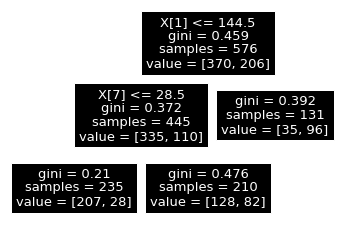

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
#plt.figure(figsize=(9,6))
tree.plot_tree(model)
plt.show()
#value=[207,28] 0,1 샘플 갯수

In [6]:
from sklearn.tree import export_text
#의사결정나무 모형에서 도출한 규칙들을 텍스트로 출력
tree_rules = export_text(model, feature_names=list(X_train.columns))
print(tree_rules)

|--- Glucose <= 144.50
|   |--- Age <= 28.50
|   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- class: 0
|--- Glucose >  144.50
|   |--- class: 1



In [7]:
#tree_ : 트리의 루트 노드
n_nodes = model.tree_.node_count
print('노드 갯수:',n_nodes)
threshold = model.tree_.threshold
print('노드의 임계값:',threshold)

노드 갯수: 5
노드의 임계값: [144.5  28.5  -2.   -2.   -2. ]
